<a href="https://colab.research.google.com/github/Myungeun-Lee/pythonpractice/blob/main/SummarizingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
!pip install nhanes
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()

In [ ]:
!pip install nhanes

     |████████████████████████████████| 1.6 MB 4.0 MB/s 


In [ ]:
from nhanes.load import load_NHANES_data, load_NHANES_metadata

data_df = load_NHANES_data(year='2017-2018')
metadata_df = load_NHANES_metadata(year='2017-2018')

In [ ]:
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()

In [ ]:
nhanes_data.head()

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,TypeOfMilkFirstFedFatFreeMilk,TypeOfMilkFirstFedSoyMilk,TypeOfMilkFirstFedOther,HowHealthyIsTheDiet,Past30DayMilkProductConsumption,YouDrinkWholeOrRegularMilk,YouDrink2FatMilk,YouDrink1FatMilk,YouDrinkFatFreeskimMilk,YouDrinkSoyMilk,YouDrinkAnotherTypeOfMilk,RegularMilkUse5TimesPerWeek,HowOftenDrankMilkAge512,HowOftenDrankMilkAge1317,HowOftenDrankMilkAge1835,CommunitygovernmentMealsDelivered,EatMealsAtCommunityseniorCenter,AttendKindergartenThruHighSchool,SchoolServesSchoolLunches,OfTimesweekGetSchoolLunch,SchoolLunchFreeReducedOrFullPrice,SchoolServeCompleteBreakfastEachDay,OfTimesweekGetSchoolBreakfast,SchoolBreakfastFreereducedfullPrice,SummerProgramMealFreereducedPrice,OfMealsNotHomePrepared,OfMealsFromFastFoodOrPizzaPlace,OfReadytoeatFoodsInPast30Days,OfFrozenMealspizzaInPast30Days,HeardOfMyPlate,...,OnSpecialDiet,WeightLosslowCalorieDiet,LowFatlowCholesterolDiet,LowSaltlowSodiumDiet,DiabeticDiet,LowCarbohydrateDiet,EnergyKcal_DR1TOT,ProteinGm_DR1TOT,CarbohydrateGm_DR1TOT,TotalSugarsGm_DR1TOT,DietaryFiberGm_DR1TOT,TotalFatGm_DR1TOT,TotalSaturatedFattyAcidsGm_DR1TOT,TotalMonounsaturatedFattyAcidsGm_DR1TOT,TotalPolyunsaturatedFattyAcidsGm_DR1TOT,CholesterolMg_DR1TOT,AlcoholGm_DR1TOT,TunaEatenDuringPast30Days,DoctorToldYouHaveDiabetes,AgeWhenFirstToldYouHadDiabetes,EverToldYouHavePrediabetes,EverToldHaveHealthRiskForDiabetes,FamilyHistory,TakingInsulinNow,TakeDiabeticPillsToLowerBloodSugar,WhatWasYourLastA1CLevel,Glycohemoglobin,SmokedAtLeast100CigarettesInLife,AgeStartedSmokingCigarettesRegularly,DoYouNowSmokeCigarettes,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,NaN,NaN,NaN,NaN,Often-once a day or more?,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,5.397605e-79,5.397605e-79,1.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes-once a week or more but less than on...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,5.397605e-79,5.397605e-79,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,1230.0,51.58,160.46,76.97,5.9,43.24,11.372,14.333,12.506,144.0,5.397605e-79,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,Sometimes-once a week or more but less than on...,NaN,NaN,NaN,NaN,NaN,30.0,{My/His/Her} milk drinking has varied over {my...,Often-once a day or more,Sometimes-once a week or more but less than on...,Sometimes-once a week or more but less than on...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,1202.0,20.01,157.45,91.55,8.4,56.98,16.435,16.432,19.786,14.0,5.397605e-79,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,6.2,1.0,16.0,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very good,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,3.000000e+00,5.397605e-79,5.397605e-79,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,1987.0,94.19,89.82,14.73,7.1,137.39,35.169,45.805

In [ ]:
nhanes_data.shape

(8366, 197)

In [ ]:
nhanes_data.columns

Index(['GeneralHealthCondition', 'EverBreastfedOrFedBreastmilk',
       'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays',
       'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage',
       'AgeFirstFedMilkdays', 'TypeOfMilkFirstFedWholeMilk',
       'TypeOfMilkFirstFed2Milk', 'TypeOfMilkFirstFed1Milk',
       ...
       'DaysSmokedCigsDuringPast30Days', 'AvgCigarettesdayDuringPast30Days',
       'TriedToQuitSmoking', 'TimesStoppedSmokingCigarettes',
       'HowLongWereYouAbleToStopSmoking',
       'UnitOfMeasureDayweekmonthyear_2_SMQ',
       'CurrentSelfreportedHeightInches', 'CurrentSelfreportedWeightPounds',
       'TriedToLoseWeightInPastYear', 'TimesLost10LbsOrMoreToLoseWeight'],
      dtype='object', length=197)

In [ ]:
my_subset = nhanes_data.loc[[93703, 93808, 102951,102955,93707], ['GeneralHealthCondition', 'AgeStoppedBreastfeedingdays','AgeInYearsAtScreening']]
my_subset.dropna()

,GeneralHealthCondition,AgeStoppedBreastfeedingdays,AgeInYearsAtScreening
SEQN,,,


In [ ]:
my_subset = nhanes_data.loc[[93703, 93808, 102951,102955,93707], ['Gender']]
my_subset

,Gender
SEQN,
93703,Female
93808,Male
102951,Male
102955,Female
93707,Male


In [ ]:
over_50_df = nhanes_data.query('AgeInYearsAtScreening > = 50')
over_50_df.shape

(2898, 197)

In [ ]:
over_50_df.head()

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,TypeOfMilkFirstFedFatFreeMilk,TypeOfMilkFirstFedSoyMilk,TypeOfMilkFirstFedOther,HowHealthyIsTheDiet,Past30DayMilkProductConsumption,YouDrinkWholeOrRegularMilk,YouDrink2FatMilk,YouDrink1FatMilk,YouDrinkFatFreeskimMilk,YouDrinkSoyMilk,YouDrinkAnotherTypeOfMilk,RegularMilkUse5TimesPerWeek,HowOftenDrankMilkAge512,HowOftenDrankMilkAge1317,HowOftenDrankMilkAge1835,CommunitygovernmentMealsDelivered,EatMealsAtCommunityseniorCenter,AttendKindergartenThruHighSchool,SchoolServesSchoolLunches,OfTimesweekGetSchoolLunch,SchoolLunchFreeReducedOrFullPrice,SchoolServeCompleteBreakfastEachDay,OfTimesweekGetSchoolBreakfast,SchoolBreakfastFreereducedfullPrice,SummerProgramMealFreereducedPrice,OfMealsNotHomePrepared,OfMealsFromFastFoodOrPizzaPlace,OfReadytoeatFoodsInPast30Days,OfFrozenMealspizzaInPast30Days,HeardOfMyPlate,...,OnSpecialDiet,WeightLosslowCalorieDiet,LowFatlowCholesterolDiet,LowSaltlowSodiumDiet,DiabeticDiet,LowCarbohydrateDiet,EnergyKcal_DR1TOT,ProteinGm_DR1TOT,CarbohydrateGm_DR1TOT,TotalSugarsGm_DR1TOT,DietaryFiberGm_DR1TOT,TotalFatGm_DR1TOT,TotalSaturatedFattyAcidsGm_DR1TOT,TotalMonounsaturatedFattyAcidsGm_DR1TOT,TotalPolyunsaturatedFattyAcidsGm_DR1TOT,CholesterolMg_DR1TOT,AlcoholGm_DR1TOT,TunaEatenDuringPast30Days,DoctorToldYouHaveDiabetes,AgeWhenFirstToldYouHadDiabetes,EverToldYouHavePrediabetes,EverToldHaveHealthRiskForDiabetes,FamilyHistory,TakingInsulinNow,TakeDiabeticPillsToLowerBloodSugar,WhatWasYourLastA1CLevel,Glycohemoglobin,SmokedAtLeast100CigarettesInLife,AgeStartedSmokingCigarettesRegularly,DoYouNowSmokeCigarettes,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,Sometimes-once a week or more but less than on...,NaN,NaN,NaN,NaN,NaN,30.0,{My/His/Her} milk drinking has varied over {my...,Often-once a day or more,Sometimes-once a week or more but less than on...,Sometimes-once a week or more but less than on...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,1202.0,20.01,157.45,91.55,8.4,56.98,16.435,16.432,19.786,14.0,5.397605e-79,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,6.2,1.0,16.0,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93708.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Excellent,Often-once a day or more?,Whole or regular,NaN,NaN,NaN,NaN,NaN,{I've/He's/She's} never been a regular milk dr...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,5.397605e-79,4.000000e+00,5.397605e-79,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,1251.0,50.96,123.71,49.84,16.6,65.49,17.446,29.000,14.823,71.0,5.397605e-79,0.0,Borderline,NaN,NaN,0.0,NaN,0.0,0.0,NaN,6.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,118.0,0.0,Never
93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,Never,NaN,NaN,NaN,NaN,NaN,NaN,{I've/He's/She's} never been a regular milk dr...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,2.000000e+00,1.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,6.3,1.0,15.0,Every day,30.0,5.0,0.0,NaN,NaN,NaN,62.0,200.0,0.0,6 to 10
93711.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very good,Rarely-less than once a week,NaN,NaN,NaN,NaN,NaN,30.0,{My/His/Her} milk drinking has varied over {my...,Often-once a day or more,Sometimes-once a week or more but less than o

In [ ]:
good_health_df = nhanes_data.query('GeneralHealthCondition == ""')
good_health_df.shape

(0, 197)

In [ ]:
nhanes_data['WeightLbs'] = nhanes_data['WeightKg'] * 2.205

In [ ]:
nhanes_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
nhanes_data['GeneralHealthConditionRevised'] = nhanes_data['GeneralHealthCondition'].replace({np.nan : 'None'})
nhanes_data['GeneralHealthConditionRevised'].unique()

array(['None', 'Good', 'Very good', 'Fair or', 'Excellent', 'Poor?'],
      dtype=object)

In [ ]:
from nhanes.load import open_variable_page
open_variable_page('GeneralHealthCondition')

In [ ]:
nhanes_data['GeneralHealthCondition'].value_counts()

Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: GeneralHealthCondition, dtype: int64

In [ ]:
GeneralHealthCondition_frequency_dist = nhanes_data['GeneralHealthCondition'].value_counts()


In [ ]:
GeneralHealthCondition_frequency_dist * 100/ GeneralHealthCondition_frequency_dist.sum()

Good         41.146881
Very good    25.888665
Fair or      19.701543
Excellent    10.378940
Poor?         2.883970
Name: GeneralHealthCondition, dtype: float64

In [ ]:
nhanes_data['GeneralHealthConditionFixed'] = nhanes_data['GeneralHealthCondition'].replace({np.nan : 'None', 'Fair or': 'Fair', 'Poor?': 'Poor'})
nhanes_data['GeneralHealthConditionFixed'].unique()

array(['None', 'Good', 'Very good', 'Fair', 'Excellent', 'Poor'],
      dtype=object)

In [ ]:
nhanes_data = load_NHANES_data()

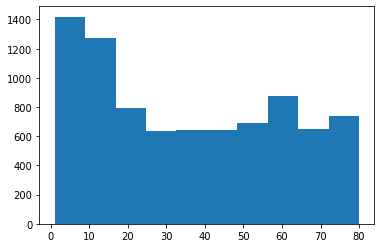

In [ ]:
age_histogram = plt.hist(nhanes_data['AgeInYearsAtScreening'])

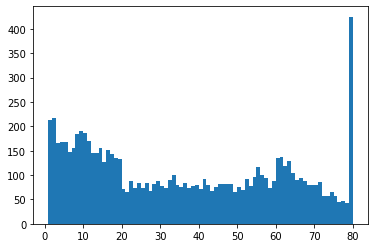

In [ ]:
bins = np.arange(nhanes_data['AgeInYearsAtScreening'].min(), nhanes_data['AgeInYearsAtScreening'].max()+1)
age_histogram_1year_bins = plt.hist(nhanes_data['AgeInYearsAtScreening'], bins=bins)

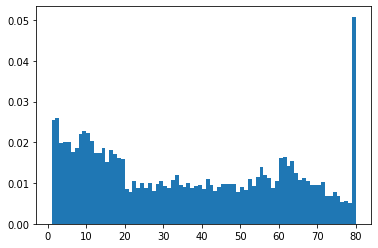

In [ ]:
age_density_1year_bins = plt.hist(nhanes_data['AgeInYearsAtScreening'], bins=bins, density=True)

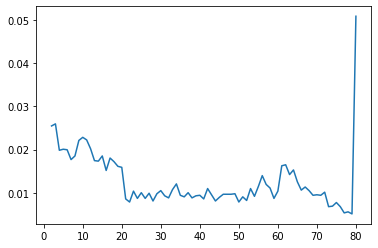

In [ ]:
plt.plot(age_density_1year_bins[1][1:], age_density_1year_bins[0])

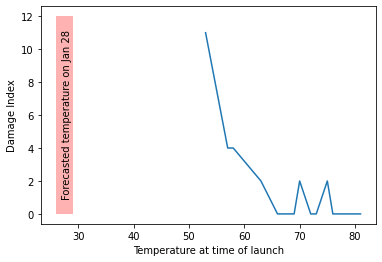

In [ ]:
oring_data = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-python/master/notebooks/data/orings.csv', index_col=0)

ax = sns.lineplot(x='Temperature', y='DamageIndex', data=oring_data, ci=None)
plt.xlabel('Temperature at time of launch')
plt.ylabel('Damage Index')
ax.fill_between([26, 29], 0, 12, 
                facecolor='red', alpha=0.3)
ax.text(27, 1, 'Forecasted temperature on Jan 28', rotation=90)
plt.show()

In [31]:
import pandas as pd
SFrain = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-python/master/notebooks/data/SanFranciscoRain.csv')

In [32]:
SFrain = SFrain.drop(columns=['STATION', 'NAME'])
SFrain

,DATE,PRCP
0,2017-01-01,0.05
1,2017-01-02,0.10
2,2017-01-03,0.40
3,2017-01-04,0.89
4,2017-01-05,0.01
...,...,...
360,2017-12-27,0.00
361,2017-12-28,0.00
362,2017-12-29,0.00
363,2017-12-30,0.00


In [34]:
SFrain['rainToday'] = SFrain['PRCP'] > 0
SFrain

,DATE,PRCP,rainToday
0,2017-01-01,0.05,True
1,2017-01-02,0.10,True
2,2017-01-03,0.40,True
3,2017-01-04,0.89,True
4,2017-01-05,0.01,True
...,...,...,...
360,2017-12-27,0.00,False
361,2017-12-28,0.00,False
362,2017-12-29,0.00,False
363,2017-12-30,0.00,False


In [35]:
pRainInSF = SFrain['rainToday'].mean()
pRainInSF

0.2

In [36]:
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()

nhanes_data['Over70'] = nhanes_data['AgeInYearsAtScreening'] > 70

In [37]:
hearing_data = nhanes_data[['Over70', 'HaveSeriousDifficultyHearing']].dropna()
hearing_data

,Over70,HaveSeriousDifficultyHearing
SEQN,,
93703.0,False,0.0
93704.0,False,0.0
93705.0,False,0.0
93706.0,False,0.0
93707.0,False,0.0
...,...,...
102952.0,False,0.0
102953.0,False,0.0
102954.0,False,0.0


In [38]:
p_over_70 = hearing_data['Over70'].mean()
p_over_70

0.10531978481769277

In [39]:
p_hearing_problem = hearing_data['HaveSeriousDifficultyHearing'].mean()
p_hearing_problem

0.06276150627615062

In [40]:
joint_table = pd.crosstab(hearing_data.Over70, hearing_data['HaveSeriousDifficultyHearing'], normalize=True)
joint_table

HaveSeriousDifficultyHearing,0.0,1.0
Over70,,
False,0.859653,0.035027
True,0.077585,0.027735


In [41]:
p_hearingproblem_given_over_70 = hearing_data.query('Over70 == True')['HaveSeriousDifficultyHearing'].mean()
p_hearingproblem_given_over_70

0.2633371169125993

In [42]:
p_over_70_given_hearingproblem = hearing_data.query('HaveSeriousDifficultyHearing == True')['Over70'].mean()
p_over_70_given_hearingproblem

0.4419047619047619

In [ ]:
adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 17')
adult_nhanes_data = adult_nhanes_data.dropna(subset=['StandingHeightCm']).rename(columns={'StandingHeightCm': 'Height'})


In [ ]:
adult_nhanes_data.shape[1]

197

In [5]:
!pip install nhanes
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()

from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()
adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 17')
adult_nhanes_data = adult_nhanes_data.dropna(subset=['StandingHeightCm']).rename(columns={'StandingHeightCm': 'Height'})
sample_size = 50
num_samples = 5000

import pandas as pd
import numpy as np


In [6]:
sampling_results = pd.DataFrame({'mean': np.zeros(num_samples)})

for sample_num in range(num_samples):
    sample = adult_nhanes_data.sample(sample_size)
    sampling_results.loc[sample_num, 'mean'] = sample['Height'].mean()

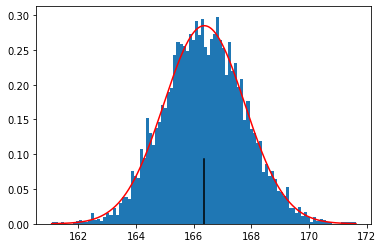

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

hist = plt.hist(sampling_results['mean'], 100, density=True)
plt.axvline(x=adult_nhanes_data['Height'].mean(),
            ymax=np.max(hist[0]), color='k')

hist_bin_min = np.min(hist[1])
hist_bin_max = np.max(hist[1])
step_size = 0.01
x_values = np.arange(hist_bin_min, hist_bin_max, step_size)
normal_values = scipy.stats.norm.pdf(
    x_values,
    loc=sampling_results['mean'].mean(),
    scale=sampling_results['mean'].std())
plt.plot(x_values, normal_values, color='r')

(array([369., 626., 925., 541., 357., 302., 241.,   0., 463., 902.]),
 array([  2000.,  11800.,  21600.,  31400.,  41200.,  51000.,  60800.,
         70600.,  80400.,  90200., 100000.]),
 <a list of 10 Patch objects>)

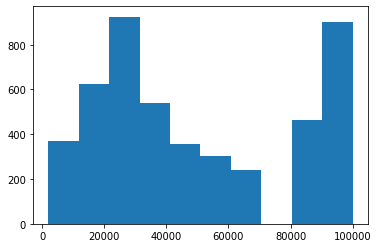

In [15]:
plt.hist(adult_nhanes_data['AnnualFamilyIncome'])

In [28]:
def sample_and_return_mean(df, variable_name, 
                           sample_size=250, num_samples=5000):
   
    sampling_distribution = pd.DataFrame({'mean': np.zeros(num_samples)})
    for sample_number in range(num_samples):
        sample_df = df.sample(sample_size)
        sampling_distribution.loc[sample_number, 'mean'] = sample_df[variable_name].mean()
    return(sampling_distribution)

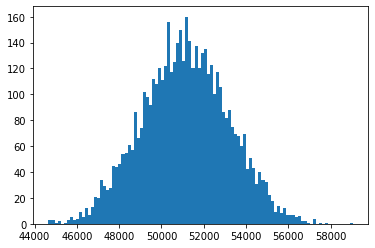

In [29]:
adult_income_data = adult_nhanes_data.dropna(subset=['AnnualFamilyIncome'])
family_income_sampling_dist = sample_and_return_mean(adult_income_data, 'AnnualFamilyIncome')
_ = plt.hist(family_income_sampling_dist['mean'], 100)

Text(0.5, 1.0, 'Sampling distribution')

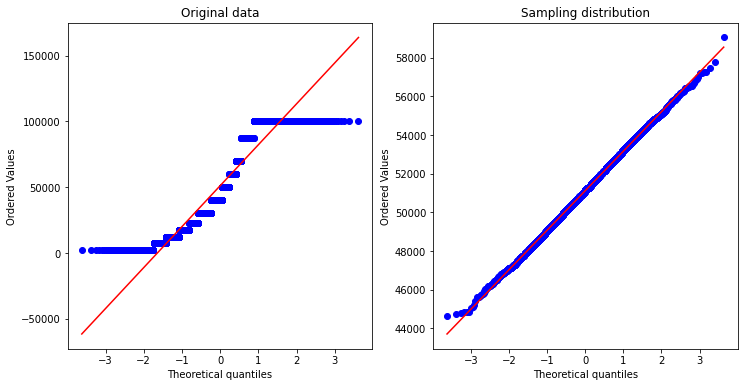

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scipy.stats.probplot(adult_income_data['AnnualFamilyIncome'], plot=sns.mpl.pyplot)
plt.title('Original data')

plt.subplot(1, 2, 2)
scipy.stats.probplot(family_income_sampling_dist['mean'], plot=sns.mpl.pyplot)
plt.title('Sampling distribution')

In [44]:
def get_confidence_interval(df, variable_name, ci_percent=95,sample_size=50):
    sample_df = df.sample(sample_size)
    mean = sample_df[variable_name].mean()
    std = sample_df[variable_name].std()
    sem = std / np.sqrt(sample_size)
    t_tail_proportion = 1 - ((100 - ci_percent) / 100) / 2
    t_cutoff = scipy.stats.t.ppf(t_tail_proportion, sample_size - 1)
    upper_ci = mean + sem * t_cutoff
    lower_ci = mean - sem * t_cutoff
    return([lower_ci, upper_ci])

In [51]:

num_runs = 1000

ci_df = pd.DataFrame({'lower': np.zeros(num_runs),
                      'upper': np.zeros(num_runs)})

for i in range(num_runs):
    ci_df.iloc[i, :] = get_confidence_interval(adult_nhanes_data,'Height')

In [47]:
ci_df['captures_mean'] = (ci_df['lower'] < adult_nhanes_data['Height'].mean()) * (ci_df['upper'] > adult_nhanes_data['Height'].mean())
ci_df['captures_mean'].mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


0.962

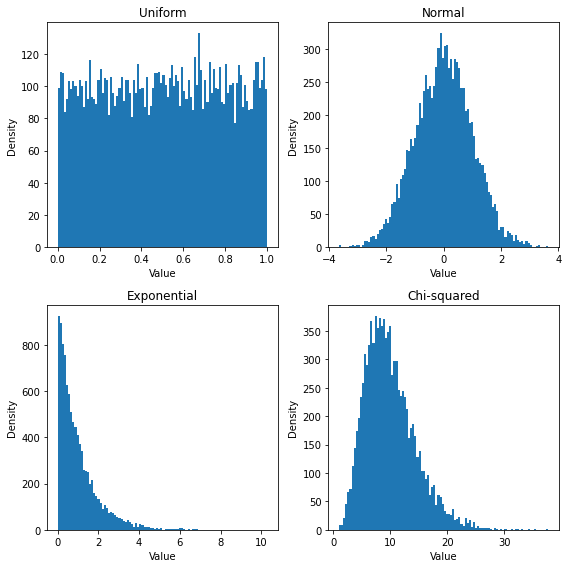

In [55]:
import scipy.stats
import matplotlib.pyplot as plt

num_samples = 10000

plt.figure(figsize=(8, 8))

generators = {'Uniform': scipy.stats.uniform, 
              'Normal': scipy.stats.norm, 
              'Exponential': scipy.stats.expon,
              'Chi-squared': scipy.stats.chi2}

generator_parameters = {'Chi-squared': 10}
panel_num = 1
for distribution in generators:
    plt.subplot(2, 2, panel_num)
    if distribution in generator_parameters:
        sample = generators[distribution].rvs(
            generator_parameters[distribution], size=num_samples)
    else:
        sample = generators[distribution].rvs(size=num_samples)
    plt.hist(sample, bins=100)
    plt.title(distribution)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    panel_num += 1

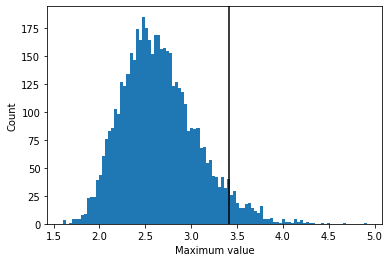

In [64]:
import numpy as np
import pandas as pd

num_runs = 5000
sample_size = 150


def sample_and_return_max(sample_size, 
                          distribution=None):

    if distribution is None:
        distribution = scipy.stats.norm
    
    sample = distribution.rvs(size=sample_size)
    return(np.max(sample))


sample_max_df = pd.DataFrame({'max': np.zeros(num_runs)})

for i in range(num_runs):
    sample_max_df.loc[i, 'max'] = sample_and_return_max(sample_size)

cutoff = scipy.stats.scoreatpercentile(sample_max_df['max'], 95)
hist = plt.hist(sample_max_df['max'], bins=100)
plt.ylabel('Count')
plt.xlabel('Maximum value')
_ = plt.axvline(x=cutoff, ymax=np.max(hist[0]), color='k')